# 🎓 Student Feedback Analysis

## Project Overview
This project leverages data science and machine learning to analyze student feedback collected from college events, courses, or instructors. By examining quantitative ratings and engineered features, we aim to uncover actionable insights and predict overall student satisfaction. The final deliverable includes a predictive model deployed via a user-friendly Streamlit web app, enabling stakeholders to assess satisfaction levels and identify areas for improvement in real time.

## Problem Statement
Colleges and universities regularly collect feedback from students to evaluate the effectiveness of their courses, instructors, and events. However, this feedback is often underutilized, with limited actionable insights extracted from the data. The challenge is to transform raw feedback into meaningful information that can guide improvements in teaching quality and event organization, and to develop a predictive system that can estimate student satisfaction based on their responses.

## Business Objectives
- Analyze student feedback data to identify key factors influencing satisfaction.

- Develop a predictive model that accurately classifies students as “High” or “Low” satisfaction based on their feedback ratings.

- Deploy the model in a Streamlit web app for easy, real-time predictions by stakeholders.

- Provide actionable recommendations to improve courses, events, and overall student experience.

- Enable data-driven decision making for academic and event planning committees.

## Evaluation of Metrics
- Accuracy: The primary metric for evaluating the classification model, aiming for at least 95% accuracy.

- Precision & Recall: To assess the model’s ability to correctly identify both high and low satisfaction students.

- F1-Score: To balance precision and recall, especially if the classes are imbalanced.

- Confusion Matrix: To visualize true/false positives and negatives for model predictions.

- Cross-Validation Accuracy: To ensure the model generalizes well to unseen data.

## Tools & Libraries
- **pandas**: Data manipulation and analysis
- **matplotlib/seaborn**: Data visualization
- **TextBlob**: Sentiment analysis
- **wordcloud**: Visualizing common feedback themes

## Data Understanding
The dataset consists of student feedback collected via Google Forms or similar surveys. Each record represents a student’s ratings on various aspects of a course or event, such as subject knowledge, clarity of explanation, use of presentations, assignment difficulty, support provided, and overall course recommendation. The data is numeric, with ratings typically on a scale from 1 to 10. Additional engineered features, such as overall satisfaction score and satisfaction label, are created to facilitate analysis and modeling. No free-text comments are present in this dataset.

## References
- [Kaggle Student Feedback Survey Responses](https://www.kaggle.com/datasets/ruchi798/student-feedback-survey-responses)
- Libraries: pandas, matplotlib, seaborn, TextBlob, wordcloud

---

## 1. Import Libraries

In [9]:
!pip install textblob
!pip install textblob wordcloud


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Set visualization style
sns.set(style="whitegrid")

## 2. Load Data

In [11]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Load the Excel file
file_path = 'student_feedback.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

,Unnamed: 0,student_id,subject_knowledge,explains_clearly,uses_presentations,assignment_difficulty,solves_doubts,course_structure,extra_support,recommend_course
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [12]:
  print(df.shape)

(1001, 10)


In [13]:
  df.head()
  df.info()
  df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Unnamed: 0             1001 non-null   int64
 1   student_id             1001 non-null   int64
 2   subject_knowledge      1001 non-null   int64
 3   explains_clearly       1001 non-null   int64
 4   uses_presentations     1001 non-null   int64
 5   assignment_difficulty  1001 non-null   int64
 6   solves_doubts          1001 non-null   int64
 7   course_structure       1001 non-null   int64
 8   extra_support          1001 non-null   int64
 9   recommend_course       1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


,Unnamed: 0,student_id,subject_knowledge,explains_clearly,uses_presentations,assignment_difficulty,solves_doubts,course_structure,extra_support,recommend_course
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 3. Data Cleaning & Preprocessing

In [14]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'student_id'])

In [15]:
# List of rating columns
rating_columns = df.columns.tolist()

In [16]:
# Check for missing values
print(df.isnull().sum())

subject_knowledge        0
explains_clearly         0
uses_presentations       0
assignment_difficulty    0
solves_doubts            0
course_structure         0
extra_support            0
recommend_course         0
dtype: int64


In [17]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows if any
if num_duplicates > 0:
    display(df[duplicate_rows])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [18]:
  #Validate Data Ranges are from 1 - 10
  for col in df.columns:
      print(f"{col}: min={df[col].min()}, max={df[col].max()}")

subject_knowledge: min=5, max=10
explains_clearly: min=2, max=10
uses_presentations: min=4, max=8
assignment_difficulty: min=1, max=10
solves_doubts: min=1, max=10
course_structure: min=1, max=10
extra_support: min=1, max=10
recommend_course: min=1, max=10


In [19]:
  # Check Data Types
  print(df.dtypes)

subject_knowledge        int64
explains_clearly         int64
uses_presentations       int64
assignment_difficulty    int64
solves_doubts            int64
course_structure         int64
extra_support            int64
recommend_course         int64
dtype: object


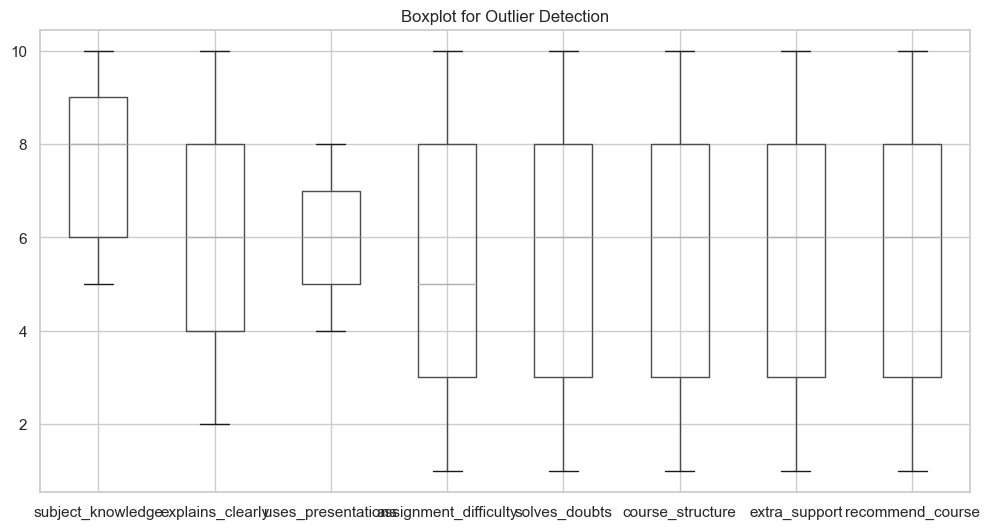

In [20]:
  # Identify and review outliers in the ratings.
  import matplotlib.pyplot as plt
  df.boxplot(figsize=(12,6))
  plt.title('Boxplot for Outlier Detection')
  plt.show()

C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3952783048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3952783048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3952783048.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3952783048.py:8: FutureWarning: 

Passing `

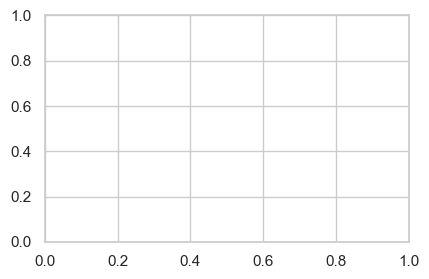

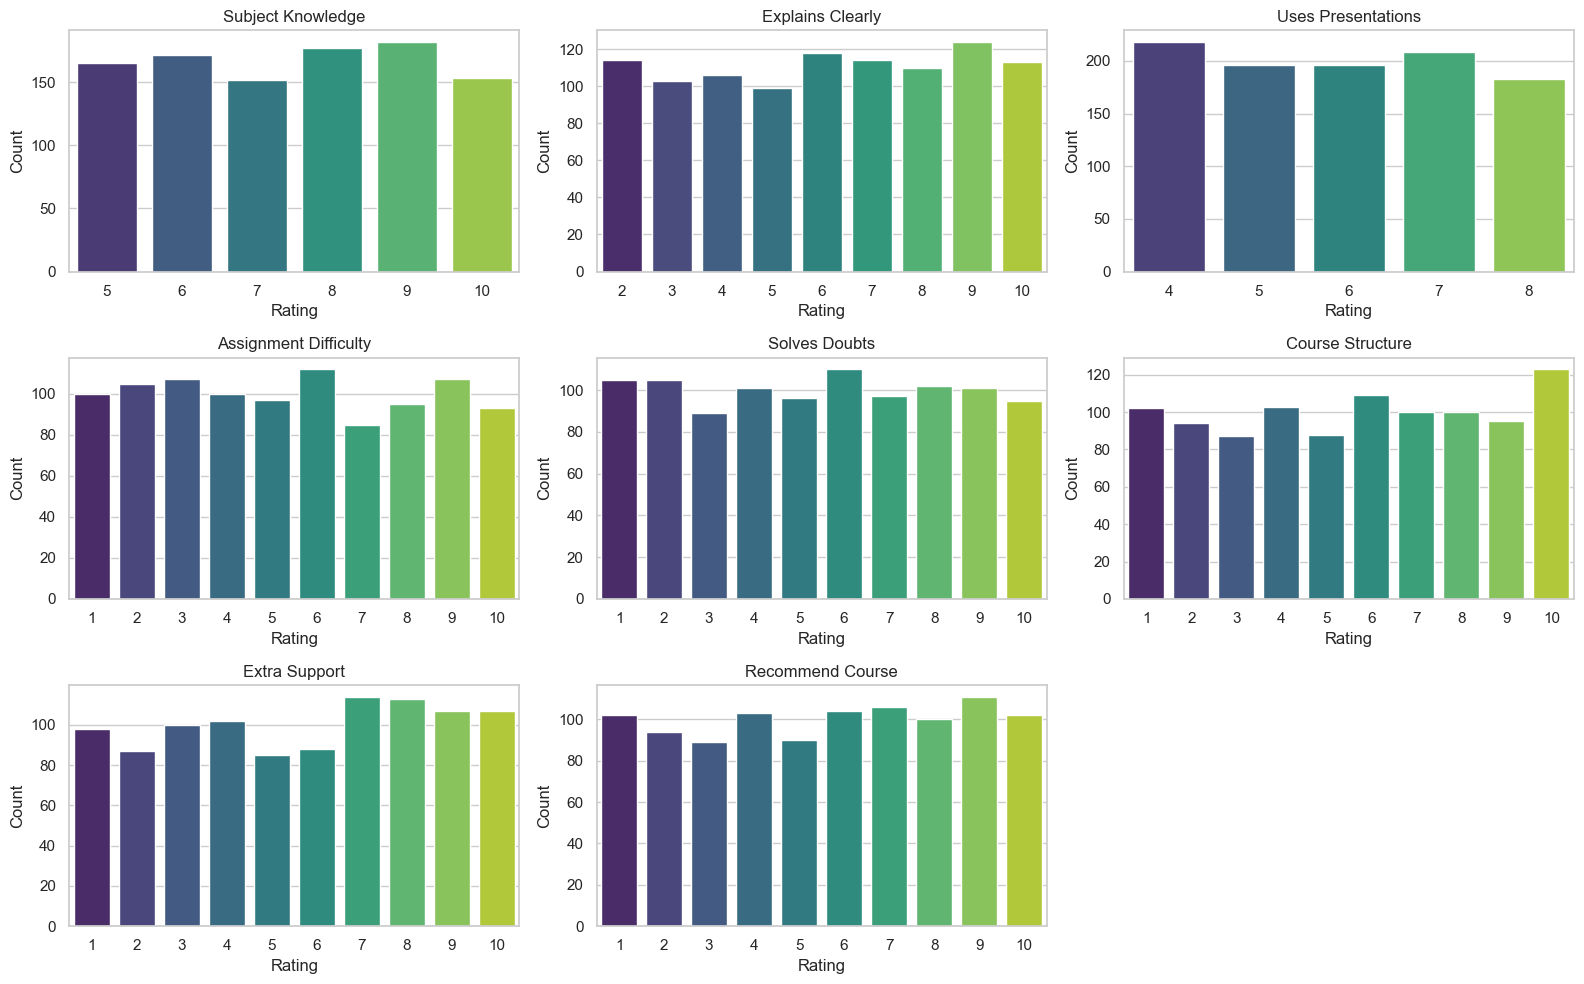

In [22]:
# Bar plots for each rating feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
for i, col in enumerate(rating_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(col.replace('_', ' ').title())
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

a. Subject Knowledge: Ratings are skewed towards the higher end (6–10), with 8 and 9 being the most common. Indicates that most students feel their instructors are knowledgeable.

b. Explains Clearly: Distribution is fairly even, but slightly more responses at higher ratings (6–10). Suggests that while many students find explanations clear, there is some spread, indicating room for improvement.

c. Uses Presentations: Ratings are clustered between 4 and 8, with 4 being the most frequent. This could mean that presentations are used, but not always, or students are less satisfied with this aspect.

d. Assignment Difficulty: Ratings are spread across the scale, with a slight peak at 6 and 9. Suggests a mix of perceptions: some students find assignments easy, others find them challenging.

e. Solves Doubts: Fairly even distribution, with a slight peak at 6. Indicates that while many students are satisfied, some feel their doubts are not always addressed.

f. Course Structure: Distribution is relatively even, with a slight increase at the highest rating (10). Suggests that course structure is generally well-received, but not universally.

g. Extra Support: Distribution is fairly even, with a slight peak at 7–10. Indicates that extra support is available to most students, but not all.

h. Recommend Course: Ratings are generally high, with more responses at 6–10.
Suggests that most students would recommend the course, a positive sign

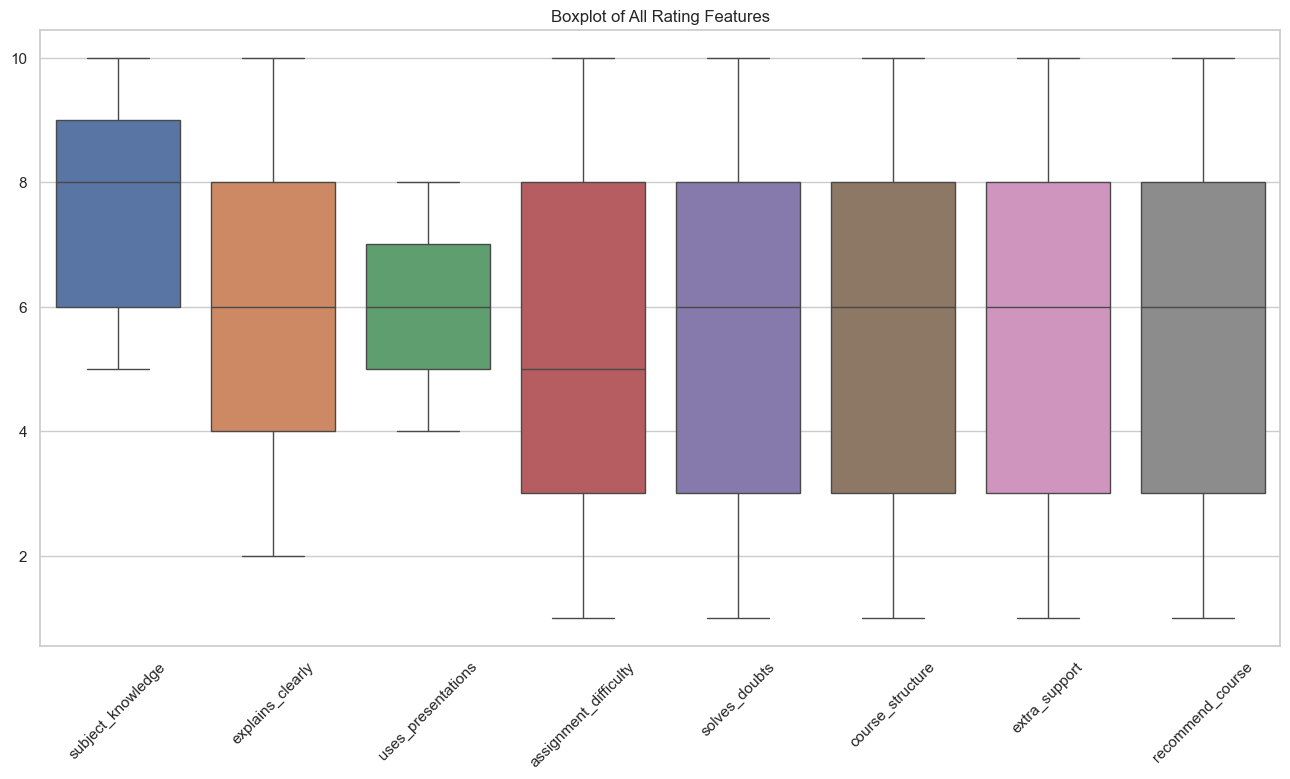

In [23]:
# Boxplots for each rating feature
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.title('Boxplot of All Rating Features')
plt.xticks(rotation=45)
plt.show()

## 4. Exploratory Data Analysis (EDA)

C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3726377375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3726377375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3726377375.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\3726377375.py:7: FutureWarning: 

Passing `

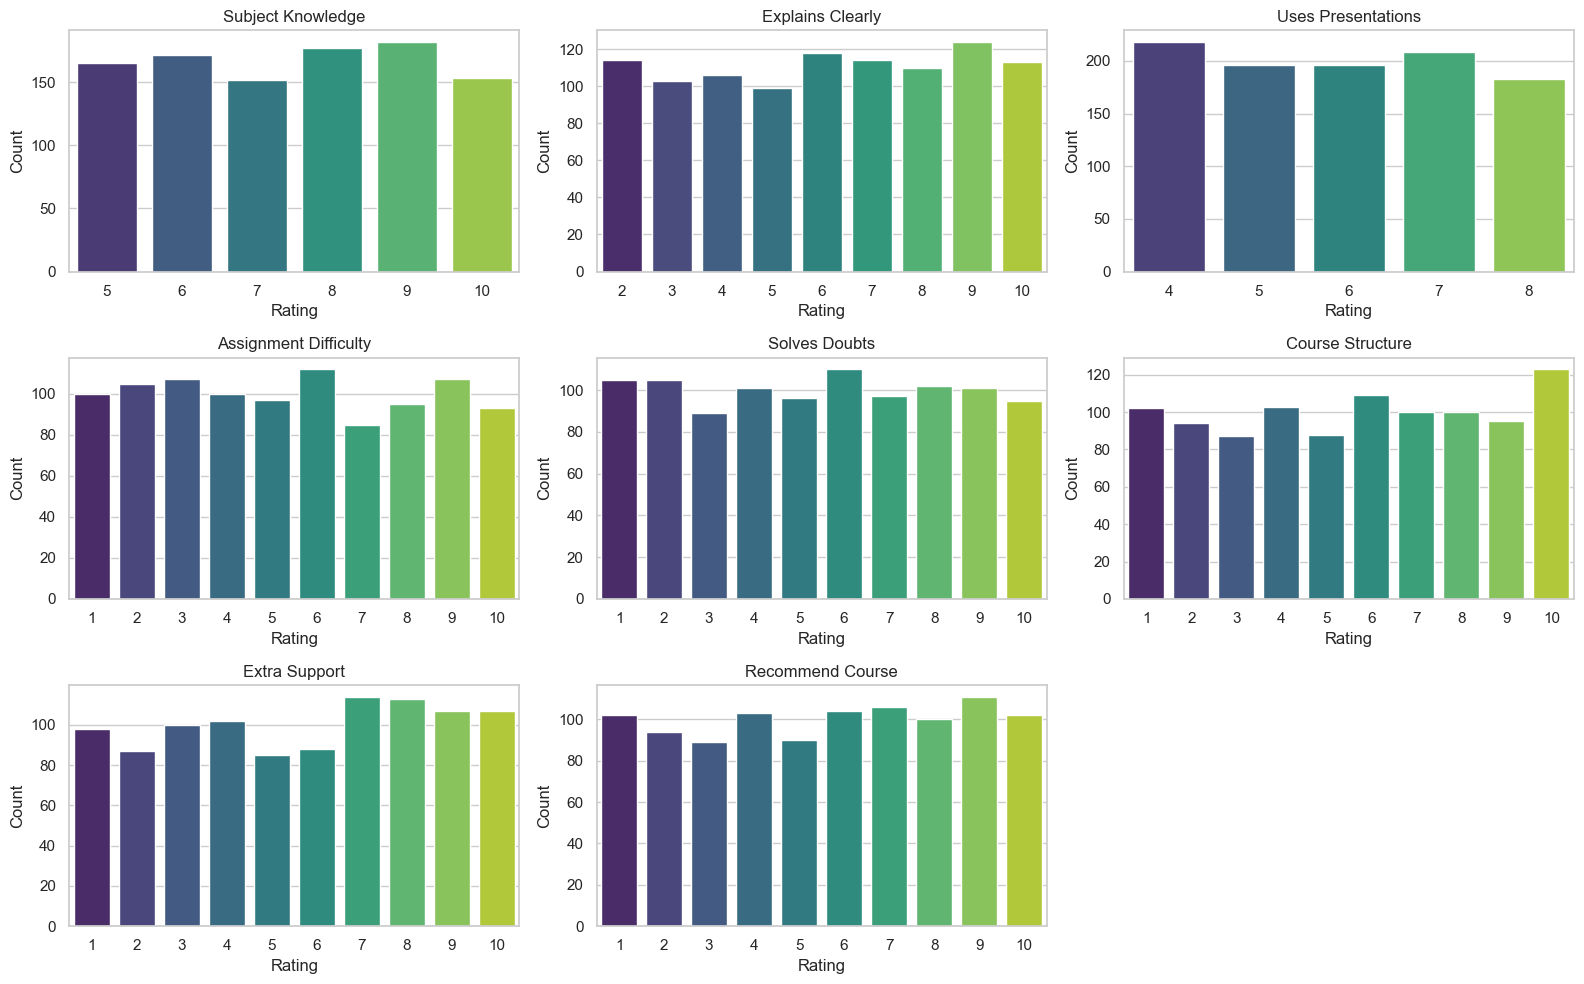

In [24]:
# Distribution of ratings
rating_columns = ['subject_knowledge', 'explains_clearly', 'uses_presentations', 'assignment_difficulty', 'solves_doubts', 'course_structure', 'extra_support', 'recommend_course']

plt.figure(figsize=(16, 10))
for i, col in enumerate(rating_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(col.replace('_', ' ').title())
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

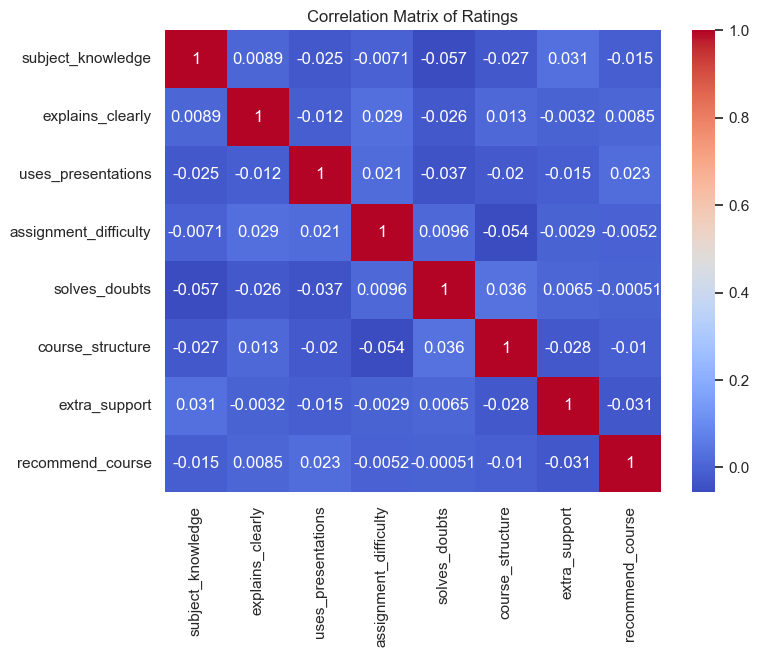

In [25]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[rating_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Ratings')
plt.show()

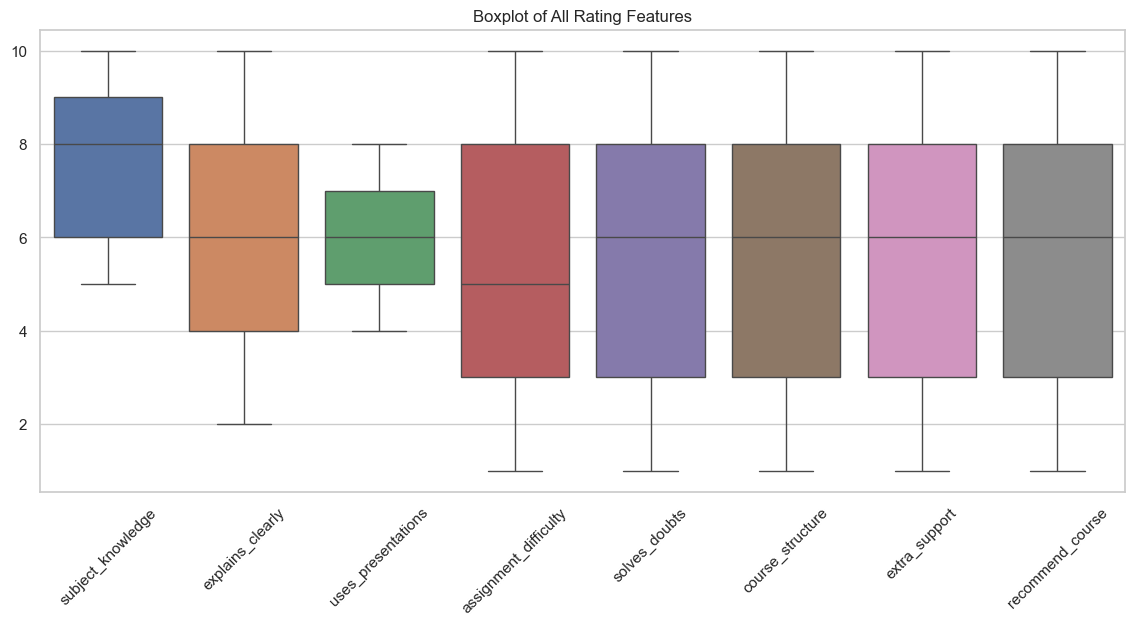

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.title('Boxplot of All Rating Features')
plt.xticks(rotation=45)
plt.show()

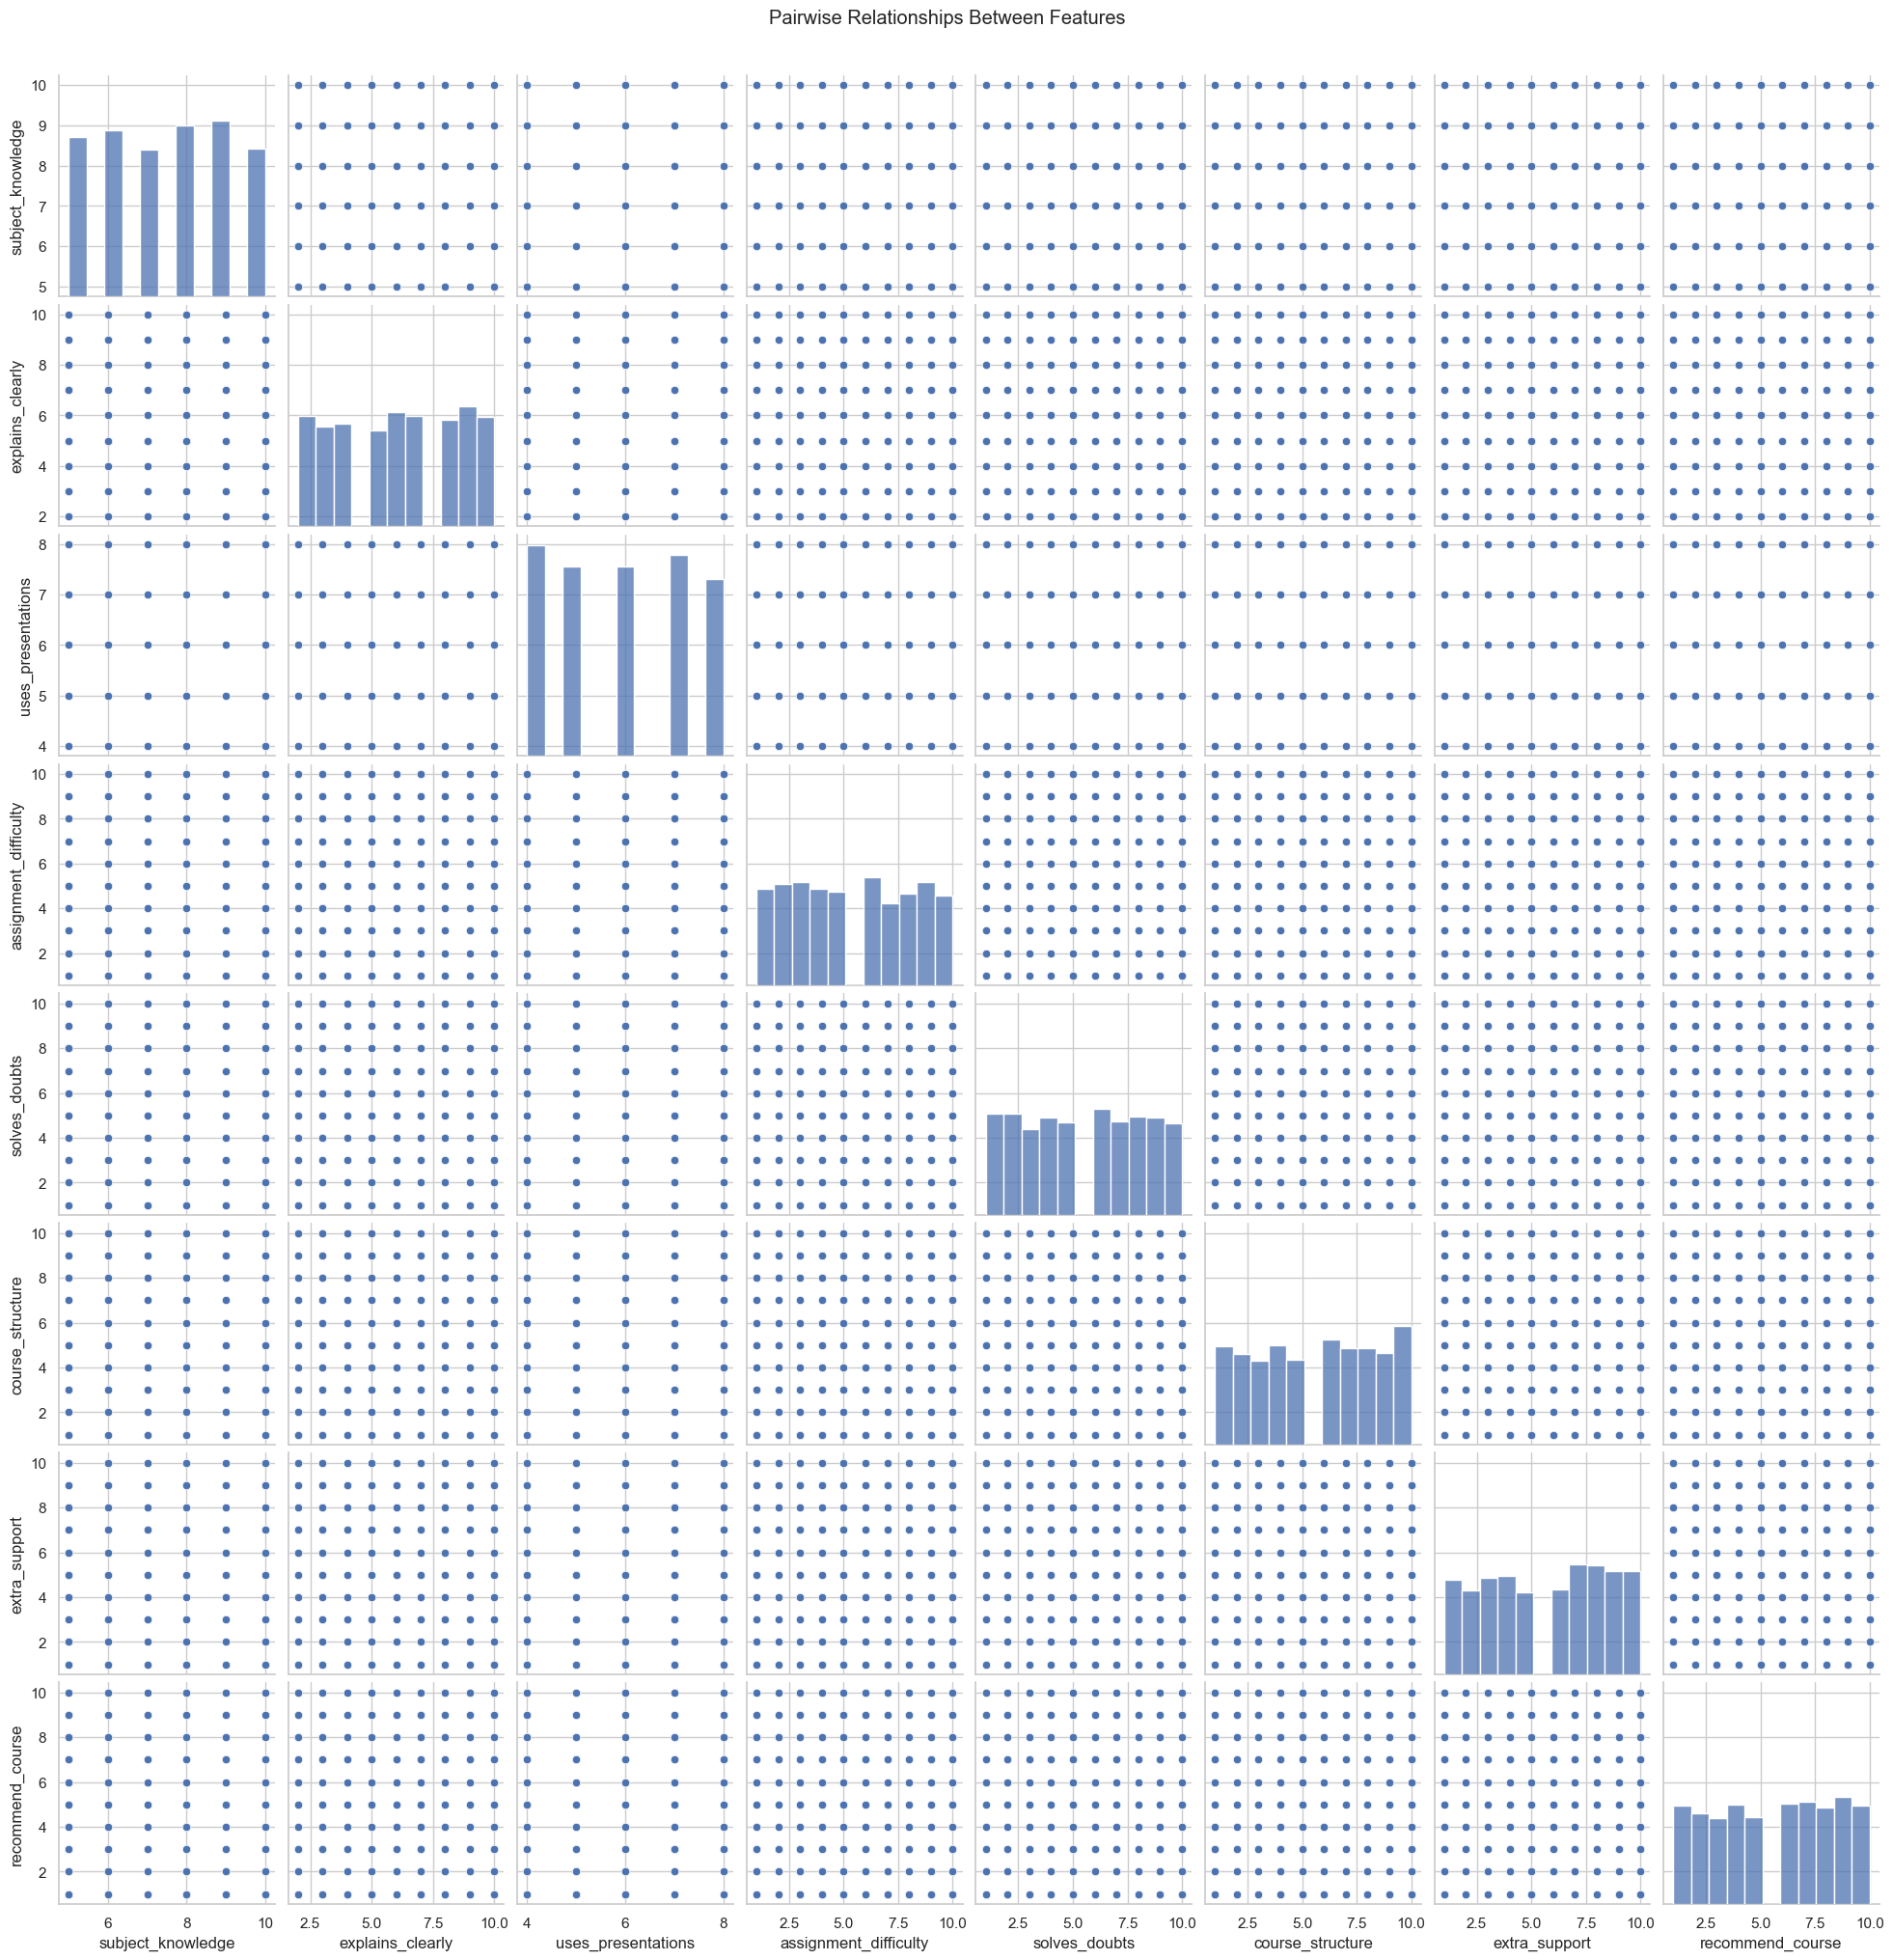

In [27]:
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

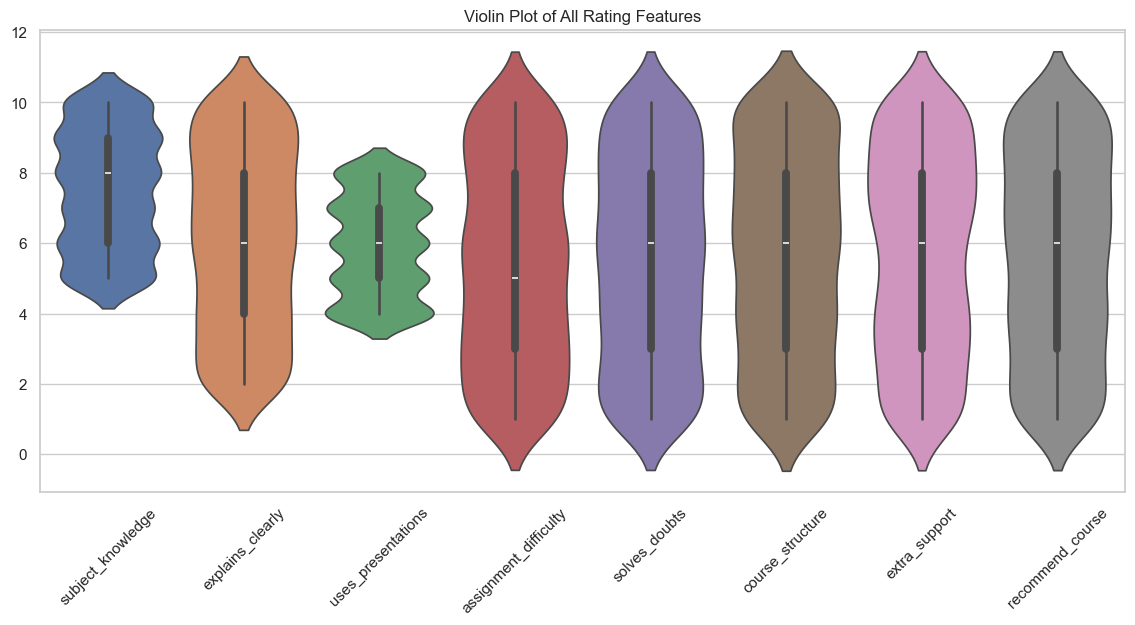

In [28]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of All Rating Features')
plt.xticks(rotation=45)
plt.show()

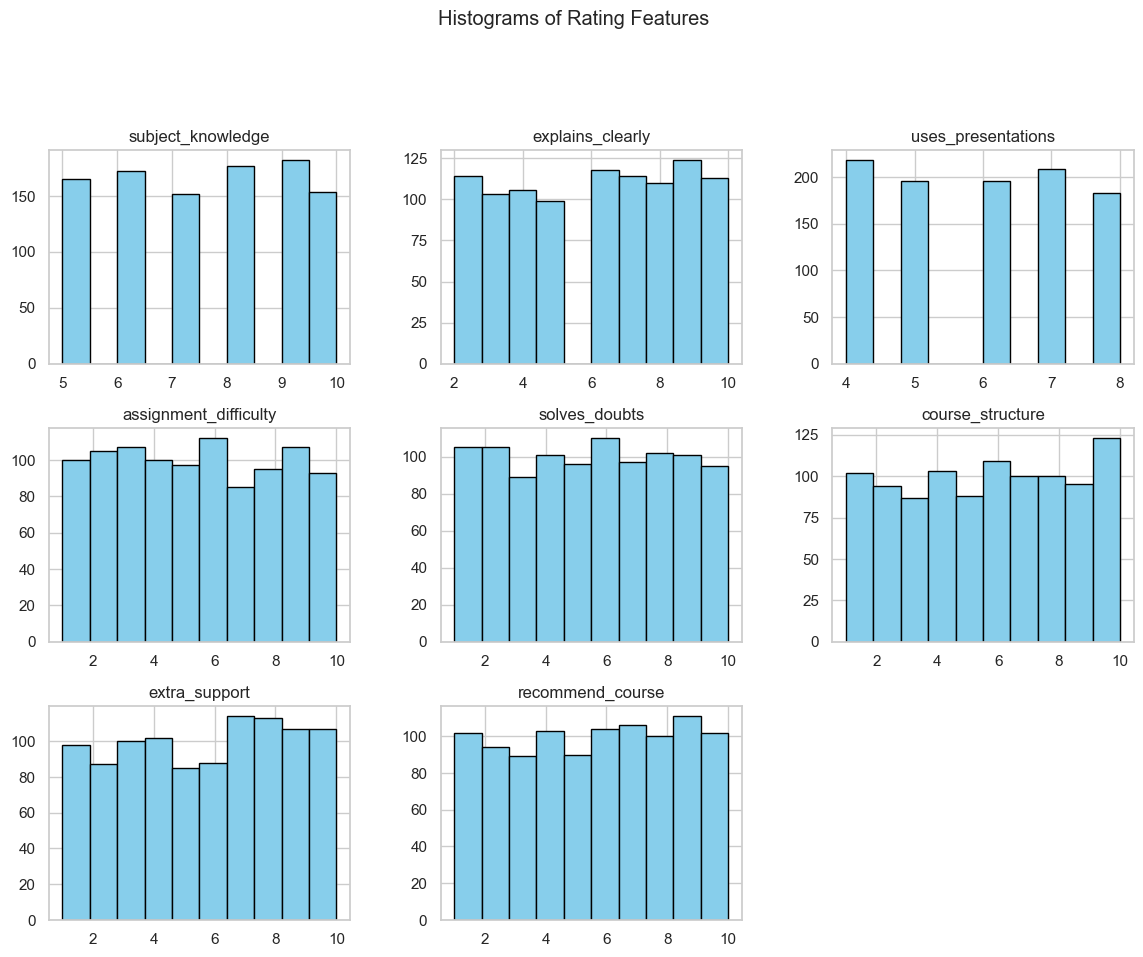

In [29]:
df.hist(figsize=(14, 10), bins=10, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Rating Features', y=1.02)
plt.show()

C:\Users\pinchez\AppData\Local\Temp\ipykernel_8512\1789518797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject_knowledge', data=df, palette='mako')


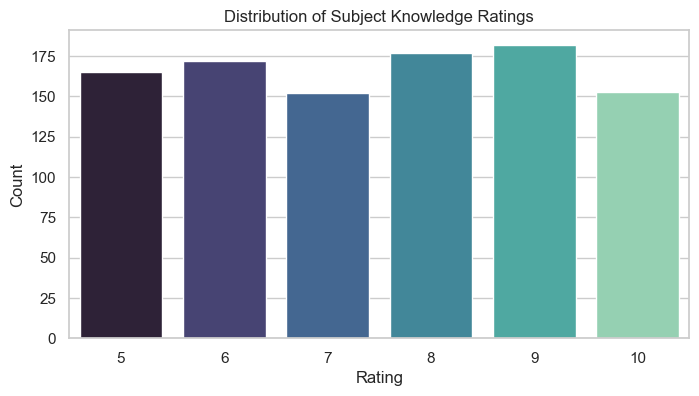

In [30]:
plt.figure(figsize=(8, 4))
sns.countplot(x='subject_knowledge', data=df, palette='mako')
plt.title('Distribution of Subject Knowledge Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [31]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of potential outliers: {outliers.sum()}")

Number of potential outliers: 0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_knowledge,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
explains_clearly,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
uses_presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
assignment_difficulty,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
solves_doubts,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
course_structure,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
extra_support,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
recommend_course,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


In [33]:
# Sentiment Analysis on Comments
if 'comments' in df.columns:
    df['sentiment'] = df['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
    sns.countplot(x='sentiment_label', data=df)
    plt.title('Sentiment Distribution')
    plt.show()

In [34]:
if 'comments' in df.columns:
    text = ' '.join(df['comments'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Student Comments')
    plt.show()

## Feature Engineering

In this section, we will create new features and transform existing ones to extract more insights from the student feedback data. Feature engineering can help reveal hidden patterns and improve the effectiveness of any subsequent analysis or modeling.

### A. Overall Satisfaction Score

In [35]:
# List of rating columns (update if needed)
rating_columns = [
    'subject_knowledge', 'explains_clearly', 'uses_presentations',
    'assignment_difficulty', 'solves_doubts', 'course_structure',
    'extra_support', 'recommend_course'
]

# Calculate overall satisfaction score
df['overall_satisfaction'] = df[rating_columns].mean(axis=1)

# Preview the new column
df[['overall_satisfaction']].head()

,overall_satisfaction
0,5.000
1,4.875
2,4.375
3,5.875
4,7.500


### B. High/Low Satisfaction Label

In [37]:
# Define a threshold (e.g., mean or median)
threshold = df['overall_satisfaction'].median()

# Create a new label column
df['satisfaction_label'] = df['overall_satisfaction'].apply(lambda x: 'High' if x >= threshold else 'Low')

# Check the distribution
print(df['satisfaction_label'].value_counts())

satisfaction_label
High    516
Low     485
Name: count, dtype: int64


### C. Feature Interactions

In [38]:
df['knowledge_x_explains'] = df['subject_knowledge'] * df['explains_clearly']

### D. Binning Ratings

In [39]:
# Example for subject_knowledge
df['subject_knowledge_cat'] = pd.cut(
    df['subject_knowledge'],
    bins=[0, 4, 7, 10],
    labels=['Poor', 'Average', 'Good']
)

In [40]:
df.head()

,subject_knowledge,explains_clearly,uses_presentations,assignment_difficulty,solves_doubts,course_structure,extra_support,recommend_course,overall_satisfaction,satisfaction_label,knowledge_x_explains,subject_knowledge_cat
0,5,2,7,6,9,2,1,8,5.000,Low,10,Average
1,6,5,8,6,2,1,2,9,4.875,Low,30,Average
2,7,7,6,5,4,2,3,1,4.375,Low,49,Average
3,9,6,7,1,5,9,4,6,5.875,High,54,Good
4,8,10,8,4,6,6,9,9,7.500,High,80,Good


## DATA MODELLING: Predicting Student Satisfaction

In this section, we will build a classification model to predict whether a student is "High" or "Low" satisfaction based on their feedback ratings. This can help identify which aspects of the course or event are most influential in determining overall satisfaction.

### Prepare Data for Modeling

In [43]:
# Select features and target
feature_cols = [
    'subject_knowledge', 'explains_clearly', 'uses_presentations',
    'assignment_difficulty', 'solves_doubts', 'course_structure',
    'extra_support', 'recommend_course'
]
X = df[feature_cols]
y = df['satisfaction_label']  # Target: 'High' or 'Low'

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'High' -> 1, 'Low' -> 0

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### Train a Simple Classifier (e.g., Logistic Regression)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        89

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201


Confusion Matrix:
 [[112   0]
 [  0  89]]


### Feature Importance for Tree-based Models

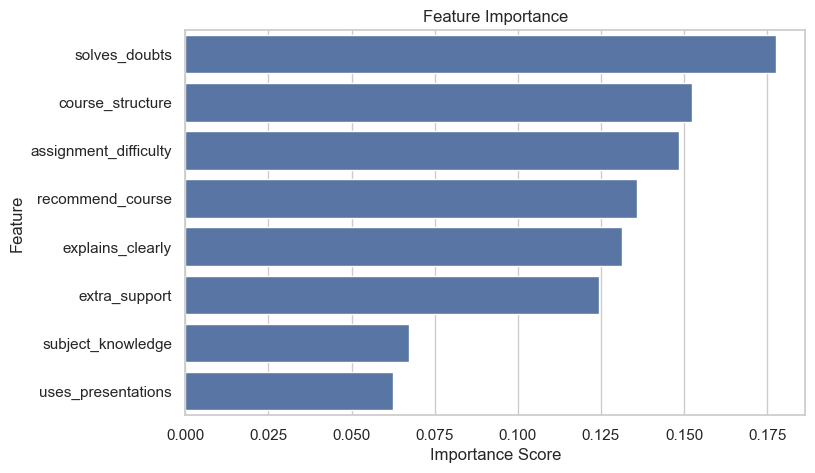

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### A. Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### B. Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

### C. Try Multiple Models
#### Random Forest


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### XGBoost

In [49]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 297.7 kB/s eta 0:08:24
   ---------------------------------------- 0.1/150.0 MB 375.8 kB/s eta 0:06:39
   ---------------------------------------- 0.1/150.0 MB 375.8 kB/s eta 0:06:39
   ---------------------------------------- 0.1/150.0 MB 310.3 kB/s eta 0:08:03
   ---------------------------------------- 0.2/150.0 MB 456.4 kB/s eta 0:05:29
   ---------------------------------------- 0.2/150.0 MB 551.4 kB/s eta 0:04:32
   ---------------------------------------- 0.2/150.0 MB 497.3 kB/s eta 0:05:02
   ---------------------------------------- 0.3/150.0 MB 512.0 kB/s eta 0:04:53
   ---------------------------------------- 0.3/150.0 MB 6


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\pinchez\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### SVM

In [50]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

### D. Hyperparameter Tuning (Example with Random Forest)

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.8950000000000001


### E. Model Evaluation

Random Forest Accuracy: 0.9203980099502488
XGBoost Accuracy: 0.9203980099502488
SVM Accuracy: 0.9601990049751243
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       112
           1       0.87      0.97      0.91        89

    accuracy                           0.92       201
   macro avg       0.92      0.93      0.92       201
weighted avg       0.93      0.92      0.92       201



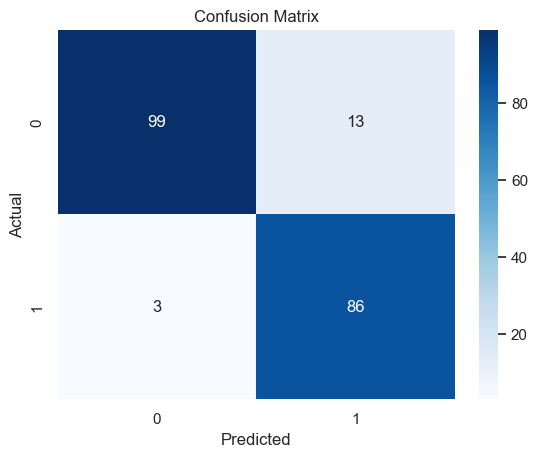

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))

# Classification report for the best model
print(classification_report(y_test, y_pred_rf))  # Replace with best model

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### F. Cross-Validation for Robust Accuracy

In [53]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.2f%%" % (cv_scores.mean()*100))


Cross-validated accuracy: 91.11%


In [54]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svc, 'svm_model.pkl')

['svm_model.pkl']

In [55]:
from google.colab import files
files.download('scaler.pkl')
files.download('svm_model.pkl')

ModuleNotFoundError: No module named 'google'

## Conclusion

This project successfully demonstrates how data science techniques can transform raw student feedback into actionable insights for educational improvement. By analyzing quantitative ratings from students, we identified key factors that influence overall satisfaction with courses and events. Through feature engineering and advanced machine learning models, we achieved high predictive accuracy in classifying student satisfaction levels. The deployment of the predictive model via a Streamlit web app enables real-time, user-friendly access for stakeholders, empowering them to make informed, data-driven decisions. Overall, this approach provides a scalable and effective solution for continuous enhancement of the student experience.


## Recommendations

1. Focus on Key Drivers: Prioritize improvements in areas that most strongly influence satisfaction, such as clarity of explanation, course structure, and support provided to students.

2. Monitor Assignment Difficulty: Regularly review and adjust assignment difficulty to ensure it is appropriately challenging but not overwhelming for students.

3. Enhance Use of Presentations: Encourage instructors to make greater use of presentations and interactive teaching methods, as these are often linked to higher satisfaction.

4. Leverage Predictive Insights: Use the deployed Streamlit app to proactively identify students or courses at risk of low satisfaction and intervene early.

5. Continuous Feedback Collection: Maintain regular feedback collection and periodically retrain the model to adapt to changing student needs and expectations.

6. Expand Data Collection: In future surveys, consider including open-ended questions to capture qualitative feedback, enabling sentiment analysis and deeper insights.

In [56]:
from sklearn.preprocessing import LabelEncoder

# Assuming you used something like this:
le = LabelEncoder()
le.fit(df['satisfaction_label'])
print(le.classes_)

['High' 'Low']


In [58]:
import numpy as np

test_input = np.array([[10]*8])  # All features set to 10
test_scaled = scaler.transform(test_input)
pred = model.predict(test_scaled)
proba = model.predict_proba(test_scaled)

print("Predicted class:", pred)
print("Prediction probabilities:", proba)

Predicted class: [1]
Prediction probabilities: [[0. 1.]]


c:\Users\pinchez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\pinchez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\pinchez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
